<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/K_project_hyunku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
1. 저장된 fullcode 목록을 불러와서 종목별 데이터 수집
2. pickle 저장

(프로젝트를 시작할 때 1번만 실행)
'''

'\n1. 저장된 fullcode 목록을 불러와서 종목별 데이터 수집\n2. pickle 저장\n\n(프로젝트를 시작할 때 1번만 실행)\n'

In [2]:
import json
import requests
import pandas as pd
from io import BytesIO
from datetime import datetime 
from datetime import timedelta
import pickle
from google.colab import drive

drive.mount('/content/drive')
output_path = '/content/drive/MyDrive/k-project/output/'
data_path = '/content/drive/MyDrive/[Shared]K-Project/'
# pickle 경로를 설정하기 위해

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 한국시간 설정
import pytz

KST = pytz.timezone('Asia/Seoul')
today = str(datetime.now(KST).strftime("%Y%m%d"))
print(today)

20211002


In [4]:
## Load pickle - fullcode 목록
with open(data_path + 'full_code.pkl',"rb") as f: 
    fullcode = pickle.load(f)
fullcode

,full_code,short_code,codeName,marketEngName,status
0,KR7060310000,060310,3S,KOSDAQ,상장
1,KR7095570008,095570,AJ네트웍스,KOSPI,상장
2,KR7006840003,006840,AK홀딩스,KOSPI,상장
3,KR7054620000,054620,APS홀딩스,KOSDAQ,상장
4,KR7265520007,265520,AP시스템,KOSDAQ,상장
...,...,...,...,...,...
2580,KR7000542001,000547,흥국화재2우B,KOSPI,상장
2581,KR7000541003,000545,흥국화재우,KOSPI,상장
2582,KR7003280005,003280,흥아해운,KOSPI,상장
2583,KR7037440005,037440,희림,KOSDAQ,상장


In [5]:
#상장폐지 상태 제외시키기.
fullcode_filter = fullcode[fullcode['status'] != '상장폐지']
fullcode_filter

,full_code,short_code,codeName,marketEngName,status
0,KR7060310000,060310,3S,KOSDAQ,상장
1,KR7095570008,095570,AJ네트웍스,KOSPI,상장
2,KR7006840003,006840,AK홀딩스,KOSPI,상장
3,KR7054620000,054620,APS홀딩스,KOSDAQ,상장
4,KR7265520007,265520,AP시스템,KOSDAQ,상장
...,...,...,...,...,...
2580,KR7000542001,000547,흥국화재2우B,KOSPI,상장
2581,KR7000541003,000545,흥국화재우,KOSPI,상장
2582,KR7003280005,003280,흥아해운,KOSPI,상장
2583,KR7037440005,037440,희림,KOSDAQ,상장


In [6]:
fullcode_list = list(fullcode_filter['full_code'])
print(fullcode_list[:10])
# fullcode열을 list로 변경 후 확인

['KR7060310000', 'KR7095570008', 'KR7006840003', 'KR7054620000', 'KR7265520007', 'KR7211270004', 'KR7027410000', 'KR7282330000', 'KR7138930003', 'KR7001460005']


In [7]:
'''
종가 시가 저가 고가 시가총액 EPS PER BPS PBR 주당배당금 배당수익률
(* 필요한 컬럼)

df2
 0   TRD_DD : 거래일자 *
 1   ISU_CD : 종목코드 *      
 2   ISU_NM : 종목명 *      
 3   MKT_NM : 시장코드 (kospi)      
 4   SECUGRP_NM : 증권구분 (주권)    
 5   TDD_CLSPRC : 종가 *  
 6   FLUC_TP_CD    
 7   CMPPRVDD_PRC : 대비 
 8   FLUC_RT : 등락률      
 9   TDD_OPNPRC : 시가 *  
 10  TDD_HGPRC  : 고가 *  
 11  TDD_LWPRC  : 저가 *  
 12  ACC_TRDVOL : 거래량   
 13  ACC_TRDVAL : 거래대금   
 14  MKTCAP : 시가총액 *

df3
 0   TRD_DD : 거래일자        
 1   TDD_CLSPRC : 종가    
 2   FLUC_TP_CD     
 3   CMPPREVDD_PRC : 대비 
 4   FLUC_RT : 등락률      
 5   EPS *           
 6   PER *           
 7   BPS *           
 8   PBR *           
 9   DPS : 주당배당금 *          
 10  DVD_YLD : 배당수익률 *
 '''

'\n종가 시가 저가 고가 시가총액 EPS PER BPS PBR 주당배당금 배당수익률\n(* 필요한 컬럼)\n\ndf2\n 0   TRD_DD : 거래일자 *\n 1   ISU_CD : 종목코드 *      \n 2   ISU_NM : 종목명 *      \n 3   MKT_NM : 시장코드 (kospi)      \n 4   SECUGRP_NM : 증권구분 (주권)    \n 5   TDD_CLSPRC : 종가 *  \n 6   FLUC_TP_CD    \n 7   CMPPRVDD_PRC : 대비 \n 8   FLUC_RT : 등락률      \n 9   TDD_OPNPRC : 시가 *  \n 10  TDD_HGPRC  : 고가 *  \n 11  TDD_LWPRC  : 저가 *  \n 12  ACC_TRDVOL : 거래량   \n 13  ACC_TRDVAL : 거래대금   \n 14  MKTCAP : 시가총액 *\n\ndf3\n 0   TRD_DD : 거래일자        \n 1   TDD_CLSPRC : 종가    \n 2   FLUC_TP_CD     \n 3   CMPPREVDD_PRC : 대비 \n 4   FLUC_RT : 등락률      \n 5   EPS *           \n 6   PER *           \n 7   BPS *           \n 8   PBR *           \n 9   DPS : 주당배당금 *          \n 10  DVD_YLD : 배당수익률 *\n '

In [8]:
url2 = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}

strtDd = '19000101'
endDd = today

for i in fullcode_list[:2]: # 테스트를 위해 2개만 실행 (두 종목만 출력됨)
    data2 = { 'bld': 'dbms/MDC/STAT/issue/MDCSTAT23902',
    'isuCd': i,
    'isuCd2': '',
    'strtDd': strtDd,
    'endDd': endDd,
    'share': '1',
    'money': '1',
    'csvxls_isNo': 'false',}

    r2 = requests.post(url2, data2, headers)
    j2 = json.loads(r2.text)
    df2=pd.DataFrame(j2['output'])
    # print(df2)
    # print('------------------------------------------------')

    data3 = { 'bld': 'dbms/MDC/STAT/standard/MDCSTAT03502',
    'isuCd': i,
    'isuCd2': i,
    'strtDd': strtDd,
    'endDd': endDd,
    'searchType': '2',
    'mktId': 'ALL',
    'csvxls_isNo': 'false',}

    r2 = requests.post(url2, data3, headers)
    j2 = json.loads(r2.text)
    df3=pd.DataFrame(j2['output'])
    # print(df3)
    # print('------------------------------------------------')

    df2_ = df2[['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC', 'TDD_LWPRC', 'MKTCAP']]
    df3_ = df3[['TRD_DD', 'EPS', 'PER', 'BPS', 'PBR', 'DPS', 'DVD_YLD']]

    result = pd.merge(df2_, df3_)
    print(result)
    print('------------------------------------------------')

          TRD_DD  ISU_CD  ISU_NM TDD_CLSPRC  ...  BPS   PBR DPS DVD_YLD
0     2021/10/01  060310      3S      3,960  ...  792  5.00   0    0.00
1     2021/09/30  060310      3S      4,105  ...  792  5.18   0    0.00
2     2021/09/29  060310      3S      4,160  ...  792  5.25   0    0.00
3     2021/09/28  060310      3S      3,985  ...  792  5.03   0    0.00
4     2021/09/27  060310      3S      4,115  ...  792  5.20   0    0.00
...          ...     ...     ...        ...  ...  ...   ...  ..     ...
4804  2002/04/29  060310  삼에스코리아      6,780  ...    -     -   -       -
4805  2002/04/26  060310  삼에스코리아      7,700  ...    -     -   -       -
4806  2002/04/25  060310  삼에스코리아      8,750  ...    -     -   -       -
4807  2002/04/24  060310  삼에스코리아      8,510  ...    -     -   -       -
4808  2002/04/23  060310  삼에스코리아      7,600  ...    -     -   -       -

[4809 rows x 14 columns]
------------------------------------------------
          TRD_DD  ISU_CD  ISU_NM TDD_CLSPRC  ...     BPS   PB

In [9]:
## Save pickle
# with open(output_path + "df2.pickle","wb") as fw:
#     pickle.dump(df2, fw)

In [10]:
#talib 설치
!wget -q http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 2>&1 > /dev/null
!tar xvzf ta-lib-0.4.0-src.tar.gz 2>&1 > /dev/null

import os

os.chdir('ta-lib')  

!./configure --prefix=/usr 2>&1 > /dev/null
!make 2>&1 > /dev/null
!make install 2>&1 > /dev/null

os.chdir('../')

!pip install TA-Lib 2>&1 > /dev/null

./configure: line 4354: /usr/bin/file: No such file or directory


In [11]:
import talib
import numpy as np

In [12]:
result

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2021/10/01,095570,AJ네트웍스,"5,770","5,830","5,890","5,680","270,164,642,150",-,-,"6,089",0.95,210,3.64
1,2021/09/30,095570,AJ네트웍스,"5,840","5,850","5,890","5,810","273,442,202,800",-,-,"6,089",0.96,210,3.60
2,2021/09/29,095570,AJ네트웍스,"5,850","5,720","5,900","5,720","273,910,425,750",-,-,"6,089",0.96,210,3.59
3,2021/09/28,095570,AJ네트웍스,"5,900","5,890","5,990","5,880","276,251,540,500",-,-,"6,089",0.97,210,3.56
4,2021/09/27,095570,AJ네트웍스,"5,980","5,910","5,980","5,850","279,997,324,100",-,-,"6,089",0.98,210,3.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,2015/08/27,095570,AJ네트웍스,"37,850","36,200","40,300","34,800","354,444,773,150","2,732",13.85,"23,715",1.60,0,0.00
1499,2015/08/26,095570,AJ네트웍스,"35,450","31,300","38,800","31,300","331,970,071,550","2,732",12.98,"23,715",1.49,0,0.00
1500,2015/08/25,095570,AJ네트웍스,"31,100","33,050","33,650","30,950","291,234,674,900","2,732",11.38,"23,715",1.31,0,0.00
1501,2015/08/24,095570,AJ네트웍스,"32,400","33,500","34,700","31,200","303,408,471,600","2,732",11.86,"23,715",1.37,0,0.00


In [13]:
result.columns

Index(['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
       'TDD_LWPRC', 'MKTCAP', 'EPS', 'PER', 'BPS', 'PBR', 'DPS', 'DVD_YLD'],
      dtype='object')

In [14]:
#데이터프레임 콤마(,) 제거 그리고 타입 소수로 변환
result['TDD_CLSPRC'] = result['TDD_CLSPRC'].str.replace(',','').astype('float')
result['TDD_OPNPRC'] = result['TDD_OPNPRC'].str.replace(',','').astype('float')
result['TDD_HGPRC'] = result['TDD_HGPRC'].str.replace(',','').astype('float')
result['TDD_LWPRC'] = result['TDD_LWPRC'].str.replace(',','').astype('float')
result['MKTCAP'] = result['MKTCAP'].str.replace(',','').astype('float')
result['BPS'] = result['BPS'].str.replace(',','').astype('float')
result

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2021/10/01,095570,AJ네트웍스,5770.0,5830.0,5890.0,5680.0,2.701646e+11,-,-,6089.0,0.95,210,3.64
1,2021/09/30,095570,AJ네트웍스,5840.0,5850.0,5890.0,5810.0,2.734422e+11,-,-,6089.0,0.96,210,3.60
2,2021/09/29,095570,AJ네트웍스,5850.0,5720.0,5900.0,5720.0,2.739104e+11,-,-,6089.0,0.96,210,3.59
3,2021/09/28,095570,AJ네트웍스,5900.0,5890.0,5990.0,5880.0,2.762515e+11,-,-,6089.0,0.97,210,3.56
4,2021/09/27,095570,AJ네트웍스,5980.0,5910.0,5980.0,5850.0,2.799973e+11,-,-,6089.0,0.98,210,3.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,2015/08/27,095570,AJ네트웍스,37850.0,36200.0,40300.0,34800.0,3.544448e+11,"2,732",13.85,23715.0,1.60,0,0.00
1499,2015/08/26,095570,AJ네트웍스,35450.0,31300.0,38800.0,31300.0,3.319701e+11,"2,732",12.98,23715.0,1.49,0,0.00
1500,2015/08/25,095570,AJ네트웍스,31100.0,33050.0,33650.0,30950.0,2.912347e+11,"2,732",11.38,23715.0,1.31,0,0.00
1501,2015/08/24,095570,AJ네트웍스,32400.0,33500.0,34700.0,31200.0,3.034085e+11,"2,732",11.86,23715.0,1.37,0,0.00


In [15]:
#단기이평선(50일), 장기이평선(200일) 생성
#이평선의 종류는 굉장히 다양. 적응형이평선, 이평선 등등 매우 많지만 기본형으로 세팅함.
short_MA = talib.MA(result['TDD_CLSPRC'],timeperiod=50,matype=0)
long_MA = talib.MA(result['TDD_CLSPRC'],timeperiod=200,matype=0)
result['50_MA'] = short_MA
result['200_MA'] = long_MA

In [16]:
result['50_MA'] = result['50_MA'].fillna(method='bfill')
result['200_MA'] = result['200_MA'].fillna(method='bfill')

In [17]:
import matplotlib.pyplot as plt

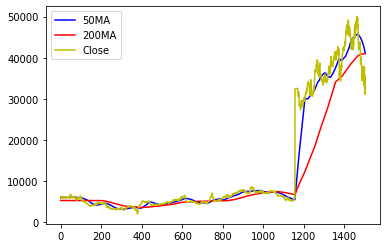

In [18]:
plt.plot(result['50_MA'],'b-',label='50MA')
plt.plot(result['200_MA'],'r-',label='200MA')
plt.plot(result['TDD_CLSPRC'],'y-',label='Close')
plt.legend()
plt.show()

In [19]:
#골든크로스 함수
def death_golden_cross():
  first_cross = 0 
  for i in range(0, len(result)):
    if result['50_MA'][i] < result['200_MA'][i] and first_cross == 0:
      print('Death cross on day', result['TRD_DD'][i], ':expect the price to continue to fall')
      first_cross=1
    elif result['50_MA'][i] > result['200_MA'][i] and first_cross ==1:
      print('Golden cross on day', result['TRD_DD'][i], ':expect the price to continue to rise')
      first_cross=0

In [20]:
death_golden_cross()

Death cross on day 2021/03/18 :expect the price to continue to fall
Golden cross on day 2020/02/17 :expect the price to continue to rise
Death cross on day 2019/01/23 :expect the price to continue to fall
Golden cross on day 2018/09/18 :expect the price to continue to rise
Death cross on day 2017/07/31 :expect the price to continue to fall
Golden cross on day 2017/01/12 :expect the price to continue to rise


In [21]:
#RSI 생성
result['RSI'] = talib.RSI(result['TDD_CLSPRC'],timeperiod=14)
result['RSI'] = result['RSI'].fillna(method='bfill')
result

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD,50_MA,200_MA,RSI
0,2021/10/01,095570,AJ네트웍스,5770.0,5830.0,5890.0,5680.0,2.701646e+11,-,-,6089.0,0.95,210,3.64,6003.8,5237.875,59.836066
1,2021/09/30,095570,AJ네트웍스,5840.0,5850.0,5890.0,5810.0,2.734422e+11,-,-,6089.0,0.96,210,3.60,6003.8,5237.875,59.836066
2,2021/09/29,095570,AJ네트웍스,5850.0,5720.0,5900.0,5720.0,2.739104e+11,-,-,6089.0,0.96,210,3.59,6003.8,5237.875,59.836066
3,2021/09/28,095570,AJ네트웍스,5900.0,5890.0,5990.0,5880.0,2.762515e+11,-,-,6089.0,0.97,210,3.56,6003.8,5237.875,59.836066
4,2021/09/27,095570,AJ네트웍스,5980.0,5910.0,5980.0,5850.0,2.799973e+11,-,-,6089.0,0.98,210,3.51,6003.8,5237.875,59.836066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,2015/08/27,095570,AJ네트웍스,37850.0,36200.0,40300.0,34800.0,3.544448e+11,"2,732",13.85,23715.0,1.60,0,0.00,42264.0,40979.000,48.987881
1499,2015/08/26,095570,AJ네트웍스,35450.0,31300.0,38800.0,31300.0,3.319701e+11,"2,732",12.98,23715.0,1.49,0,0.00,42045.0,40980.000,42.927739
1500,2015/08/25,095570,AJ네트웍스,31100.0,33050.0,33650.0,30950.0,2.912347e+11,"2,732",11.38,23715.0,1.31,0,0.00,41719.0,40958.750,34.578251
1501,2015/08/24,095570,AJ네트웍스,32400.0,33500.0,34700.0,31200.0,3.034085e+11,"2,732",11.86,23715.0,1.37,0,0.00,41407.0,40945.750,38.432269


In [22]:
#ROC생성
result['ROC'] = talib.ROC(result['TDD_CLSPRC'],timeperiod=10)
result['ROC'] = result['ROC'].fillna(method='bfill')
result

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD,50_MA,200_MA,RSI,ROC
0,2021/10/01,095570,AJ네트웍스,5770.0,5830.0,5890.0,5680.0,2.701646e+11,-,-,6089.0,0.95,210,3.64,6003.8,5237.875,59.836066,3.986135
1,2021/09/30,095570,AJ네트웍스,5840.0,5850.0,5890.0,5810.0,2.734422e+11,-,-,6089.0,0.96,210,3.60,6003.8,5237.875,59.836066,3.986135
2,2021/09/29,095570,AJ네트웍스,5850.0,5720.0,5900.0,5720.0,2.739104e+11,-,-,6089.0,0.96,210,3.59,6003.8,5237.875,59.836066,3.986135
3,2021/09/28,095570,AJ네트웍스,5900.0,5890.0,5990.0,5880.0,2.762515e+11,-,-,6089.0,0.97,210,3.56,6003.8,5237.875,59.836066,3.986135
4,2021/09/27,095570,AJ네트웍스,5980.0,5910.0,5980.0,5850.0,2.799973e+11,-,-,6089.0,0.98,210,3.51,6003.8,5237.875,59.836066,3.986135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,2015/08/27,095570,AJ네트웍스,37850.0,36200.0,40300.0,34800.0,3.544448e+11,"2,732",13.85,23715.0,1.60,0,0.00,42264.0,40979.000,48.987881,9.235209
1499,2015/08/26,095570,AJ네트웍스,35450.0,31300.0,38800.0,31300.0,3.319701e+11,"2,732",12.98,23715.0,1.49,0,0.00,42045.0,40980.000,42.927739,-0.977654
1500,2015/08/25,095570,AJ네트웍스,31100.0,33050.0,33650.0,30950.0,2.912347e+11,"2,732",11.38,23715.0,1.31,0,0.00,41719.0,40958.750,34.578251,-10.632184
1501,2015/08/24,095570,AJ네트웍스,32400.0,33500.0,34700.0,31200.0,3.034085e+11,"2,732",11.86,23715.0,1.37,0,0.00,41407.0,40945.750,38.432269,-11.111111


In [23]:
#STC 생성
result['STOCH'] = talib.STOCH(result['TDD_HGPRC'],result['TDD_LWPRC'],result['TDD_CLSPRC'])
result

ValueError: ignored